In [111]:
# Required Libraries

from Bio.Affy import CelFile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from itertools import cycle


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense


## Read Soft file 

In [112]:
import GEOparse
gse = GEOparse.get_GEO(filepath="D:/DS5500/Data2/GSE34289_family.soft.gz")

05-Nov-2020 20:52:38 INFO GEOparse - Parsing D:/DS5500/Data2/GSE34289_family.soft.gz: 
05-Nov-2020 20:52:38 DEBUG GEOparse - DATABASE: GeoMiame
05-Nov-2020 20:52:38 DEBUG GEOparse - SERIES: GSE34289
05-Nov-2020 20:52:38 DEBUG GEOparse - PLATFORM: GPL5175
05-Nov-2020 20:52:42 DEBUG GEOparse - PLATFORM: GPL14961
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846410
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846411
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846412
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846413
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846414
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846415
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846416
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846417
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846418
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846419
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846420
05-Nov-2020 20:52:42 DEBUG GEOparse - SAMPLE: GSM846421
05-Nov-2020 20:5

## Process Read Soft file

In [113]:
print()
name = []
value1 = []
res = []
table = []

for gsm_name, gsm in gse.gsms.items():
   
    
    for key, value in gsm.metadata.items():
        
        if key == 'title':
            name.append(value)
            table.append(gsm.table['VALUE'])
        if key == 'characteristics_ch1':
            
            temp = []
            headers = []
            for val in value:
                t = val.split(':')
                t[1] = t[1].strip()
                if not res:
                    headers.append(t[0])
                temp.append(t[1])
            if headers:
                res.append(headers)
            res.append(temp)



   
    




## Transfer Data and Save it as csv

In [114]:
x = pd.DataFrame(res)
x.columns = x.iloc[0]
x = x[1:]
x = x.reset_index()

In [115]:
y = pd.DataFrame(name,columns=['Name'])

In [116]:
a = gsm.table['ID_REF']
z = np.array(table)
data = pd.DataFrame(z,columns = a)



In [117]:
Thyroid_data = pd.concat([y,x,data],axis = 1)
Thyroid_data = Thyroid_data.drop(columns='index')

In [118]:
Thyroid_data

,Name,tissue,cytology,histology,gender,patient age (yrs),2604998,3603932,2710599,2440258,...,2883317,2479698,3428225,3393446,3116614,3415320,3757108,4012178,3546213,3561381
0,V010001_I_B,thyroid nodule,indeterminate,benign,male,59,7.89939,6.71221,6.94637,8.26077,...,5.00430,5.95977,3.81445,7.18677,13.17041,9.68904,7.59039,6.44127,10.81019,9.68135
1,V010002_I_B,thyroid nodule,indeterminate,benign,female,31,9.13224,7.04476,8.47019,6.76420,...,4.43930,6.55355,3.57953,6.75765,13.16906,9.64440,9.04069,9.78057,11.41068,10.86030
2,V010003_M_M,thyroid nodule,malignant,malignant,male,47,9.14776,7.39454,11.45469,5.67129,...,4.21274,5.84232,3.57108,6.65226,12.76220,10.50970,10.12734,9.89706,11.23792,10.43485
3,V010004_I_B,thyroid nodule,indeterminate,benign,female,64,7.28540,8.10451,6.30300,8.27751,...,5.04816,6.05043,4.02865,7.75566,11.39113,9.67885,7.55350,6.47333,8.80009,7.97312
4,V010005_I_B,thyroid nodule,indeterminate,benign,male,63,7.47738,7.46995,10.12902,6.96364,...,5.10221,5.84066,3.47490,7.49669,12.50910,10.59272,10.56094,6.16607,9.96107,8.56193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,V010364_I_M,thyroid nodule,indeterminate,malignant,female,58,7.46757,9.19658,7.97002,6.46740,...,4.83890,5.82202,3.57385,8.09130,12.40206,11.15723,9.16768,8.26404,9.96900,8.49770
363,V010365_B_B,thyroid nodule,benign,benign,male,61,6.92935,7.84640,6.66331,9.43262,...,4.58916,5.85221,3.71531,7.87648,11.80550,8.91946,7.58986,6.58325,9.24136,7.66123
364,V010366_I_B,thyroid nodule,indeterminate,benign,female,46,8.11200,7.19688,6.04374,5.94640,...,4.90152,5.91836,3.65402,7.05644,12.90815,10.60394,8.24617,8.59205,11.31751,10.27916
365,V010367_M_M,thyroid nodule,malignant,malignant,male,70,8.30596,7.61639,11.55722,6.70903,...,5.11622,5.96668,3.73562,7.42159,11.99856,10.51931,10.84894,10.97646,10.99828,10.04883


In [119]:
Thyroid_data.to_csv('D:/DS5500/Data2/Thyroid_data.csv' ,index=False)

In [120]:
Thyroid_data_test = Thyroid_data[Thyroid_data.cytology == 'indeterminate']
Thyroid_data_train = Thyroid_data[Thyroid_data.cytology != 'indeterminate']
X_Train_age = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'cytology', 'gender'])
Y_Train = Thyroid_data_train['cytology']

## With age and Gender
X_Train = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'cytology'])
Y_Train = Thyroid_data_train['cytology']
gender = label_binarize(X_Train['gender'],classes = ['male', 'female'])
X_Train['gender'] = gender



## Remove Age and Gender
X_Train_age_gender = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'cytology', 'gender','patient age (yrs)'])
Y_Train = Thyroid_data_train['cytology']

## Remove age
X_Train_gender = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'cytology', 'patient age (yrs)'])
Y_Train = Thyroid_data_train['cytology']
gender = label_binarize(X_Train_gender['gender'],classes = ['male', 'female'])
X_Train_gender['gender'] = gender

In [121]:
#With Age and Gender
X_Test = Thyroid_data_test.drop(columns = ['Name', 'tissue', 'histology', 'cytology'])
Y_Test = Thyroid_data_train['histology']
gender = label_binarize(X_Test['gender'],classes = ['male', 'female'])
X_Test['gender'] = gender

# Remove Gender
X_Test_age = Thyroid_data_test.drop(columns = ['Name', 'tissue', 'histology', 'cytology','gender'])
Y_Test = Thyroid_data_test['histology']

## Remove Age and Gender
X_Test_age_gender = Thyroid_data_test.drop(columns = ['Name', 'tissue', 'histology', 'cytology','gender','patient age (yrs)'])
Y_Test = Thyroid_data_test['histology']

## Remove Age
X_Test_gender = Thyroid_data_test.drop(columns = ['Name', 'tissue', 'histology', 'cytology','patient age (yrs)'])
gender = label_binarize(X_Test_gender['gender'],classes = ['male', 'female'])
X_Test_gender['gender'] = gender
Y_Test = Thyroid_data_test['histology']


## Exploratory Data Analysis

In [122]:
Thyroid_data.shape

(367, 179)

In [123]:

Thyroid_data.groupby('histology').count()

,Name,tissue,cytology,gender,patient age (yrs),2604998,3603932,2710599,2440258,3169331,...,2883317,2479698,3428225,3393446,3116614,3415320,3757108,4012178,3546213,3561381
histology,,,,,,,,,,,,,,,,,,,,,
benign,224,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,224,224,224
malignant,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143


In [124]:

Thyroid_data.groupby('cytology').count()

,Name,tissue,histology,gender,patient age (yrs),2604998,3603932,2710599,2440258,3169331,...,2883317,2479698,3428225,3393446,3116614,3415320,3757108,4012178,3546213,3561381
cytology,,,,,,,,,,,,,,,,,,,,,
benign,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
indeterminate,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
malignant,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55


Text(0.5, 1.0, 'Histology for Indeterminate Samples')

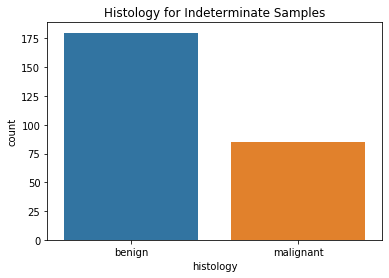

In [125]:
TD = Thyroid_data[Thyroid_data.cytology == 'indeterminate']
TD.groupby('histology').count()
plt_t = sns.countplot(x="histology", data=TD)
plt_t.set_title('Histology for Indeterminate Samples')

In [17]:
Thyroid_data.groupby('gender').count()

,Name,tissue,cytology,histology,patient age (yrs),2604998,3603932,2710599,2440258,3169331,...,2883317,2479698,3428225,3393446,3116614,3415320,3757108,4012178,3546213,3561381
gender,,,,,,,,,,,,,,,,,,,,,
female,279,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
male,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88


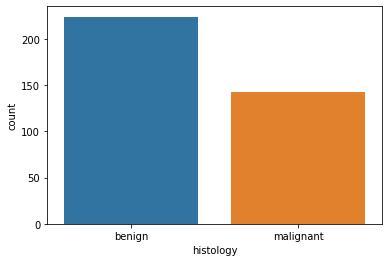

In [18]:
sns.countplot(x="histology", data=Thyroid_data)

Text(0.5, 1.0, 'Cytology for whole data')

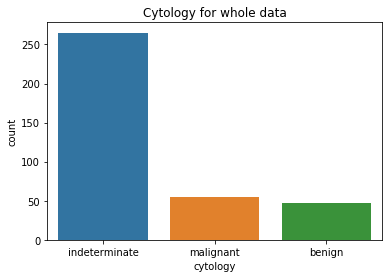

In [19]:

plt_t = sns.countplot(x="cytology", data=Thyroid_data)
plt_t.set_title('Cytology for whole data')

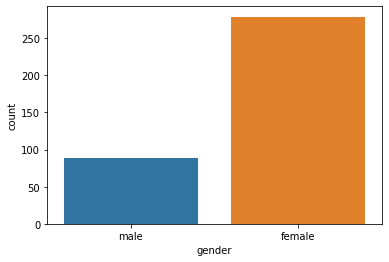

In [20]:
sns.countplot(x="gender", data=Thyroid_data)

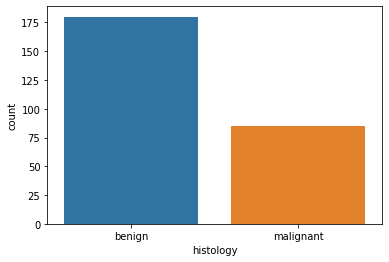

In [21]:
yt = pd.DataFrame(Y_Test)
yt.columns = ['histology']
sns.countplot(x="histology", data=yt)

Text(0.5, 1.0, 'Cytology For Training Samples')

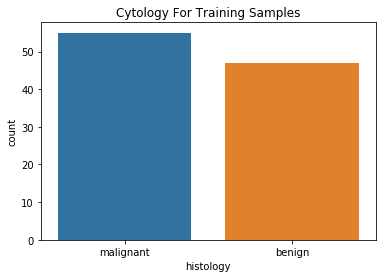

In [22]:

y = pd.DataFrame(Y_Train)

y.columns = ['histology']
plt_t = sns.countplot(x="histology", data=y)
plt_t.set_title('Cytology For Training Samples')




## Logistic Regression With Age

In [126]:
clf = LogisticRegression()
y_score = clf.fit(X_Train, Y_Train).decision_function(X_Test)
Y_Pred = clf.predict(X_Test)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
def Evaluation(X_Test,Y_Test,Y_Pred):
    print('Confusion Matrix:', confusion_matrix(Y_Test, Y_Pred))
    print('Accuracy:', accuracy_score(Y_Test,Y_Pred))
    tn, fp, fn, tp = confusion_matrix(Y_Test, Y_Pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp/(tn+fp)
    print("Specificity:", specificity)
    print("sensitivity", sensitivity)
    # Compute ROC curve and ROC area for each class
    n_classes = 2
    ytest = label_binarize(Y_Test,classes = ['benign', 'malignant'])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytest, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic NaiveBayes + MI')
    plt.legend(loc="lower right")
    plt.show()
    
    print('Precision:', precision_score(Y_Test, Y_Pred, average='macro'))
    print('Recall:', recall_score(Y_Test,Y_Pred, average = 'macro'))
    print(classification_report(Y_Test, Y_Pred, target_names= ['benign', 'malignant'] ))
    
   
    
    

## Logistic Regression without Age and Gender

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[167  13]
 [ 40  45]]
Accuracy: 0.8
Specificity: 0.9277777777777778
sensitivity 0.25


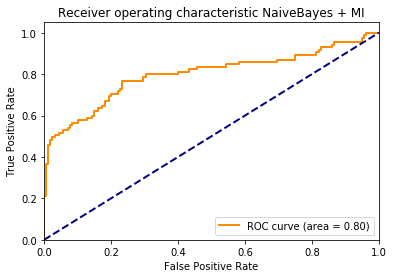

Precision: 0.791312676994836
Recall: 0.7285947712418301
              precision    recall  f1-score   support

      benign       0.81      0.93      0.86       180
   malignant       0.78      0.53      0.63        85

    accuracy                           0.80       265
   macro avg       0.79      0.73      0.75       265
weighted avg       0.80      0.80      0.79       265



In [128]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_age_gender, Y_Train).decision_function(X_Test_age_gender)
Y_Pred = clf.predict(X_Test_age_gender)
Evaluation(X_Test_age_gender,Y_Test,Y_Pred)

## Logistic Regression with Gender

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[168  12]
 [ 40  45]]
Accuracy: 0.8037735849056604
Specificity: 0.9333333333333333
sensitivity 0.25


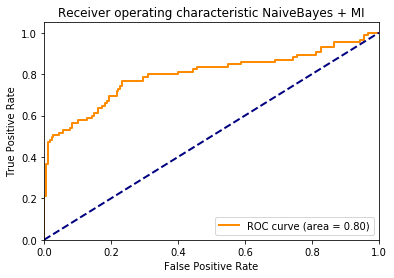

Precision: 0.798582995951417
Recall: 0.7313725490196079
              precision    recall  f1-score   support

      benign       0.81      0.93      0.87       180
   malignant       0.79      0.53      0.63        85

    accuracy                           0.80       265
   macro avg       0.80      0.73      0.75       265
weighted avg       0.80      0.80      0.79       265



In [129]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_gender, Y_Train).decision_function(X_Test_gender)
Y_Pred = clf.predict(X_Test_gender)
Evaluation(X_Test_gender,Y_Test,Y_Pred)

## Logistic Regression with age and Gender

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[174   6]
 [ 41  44]]
Accuracy: 0.8226415094339623
Specificity: 0.9666666666666667
sensitivity 0.24444444444444444


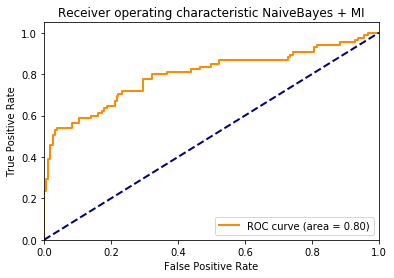

Precision: 0.8446511627906976
Recall: 0.7421568627450981
              precision    recall  f1-score   support

      benign       0.81      0.97      0.88       180
   malignant       0.88      0.52      0.65        85

    accuracy                           0.82       265
   macro avg       0.84      0.74      0.77       265
weighted avg       0.83      0.82      0.81       265



In [130]:
clf = LogisticRegression()
y_score = clf.fit(X_Train, Y_Train).decision_function(X_Test)
Y_Pred = clf.predict(X_Test)
Evaluation(X_Test,Y_Test,Y_Pred)

## PCA 

In [131]:
transformer = Normalizer().fit(X_Train_age_gender)  
X_Train_Normalized = transformer.transform(X_Train_age_gender)
X_Test_Normalized =  transformer.transform(X_Test_age_gender)

In [132]:
pca = PCA(n_components=7)
# pca.fit(X_Train_Normalized)
# print(pca.explained_variance_ratio_)
X_pca = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'gender'])
X_pca['cytology'] = label_binarize(Y_Train,classes = ['benign', 'malignant'])
Pca_data = pca.fit_transform(X_pca)

In [133]:
pca = PCA(n_components=7)
pca.fit(X_Train)
print(pca.explained_variance_ratio_)
X_Train_pca = pca.transform(X_Train)
X_Test_pca = pca.transform(X_Test)

[0.49383968 0.22202118 0.06022462 0.05321697 0.03288283 0.0231943
 0.01096149]


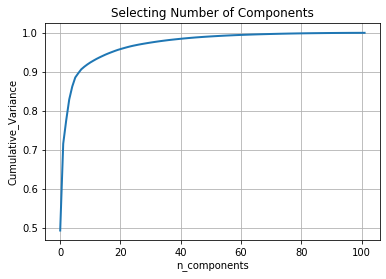

In [134]:
pca = PCA()
Pca_data = pca.fit_transform(X_pca)
pca.n_components=102

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.title('Selecting Number of Components')
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance')  
plt.show()


In [135]:
pca=PCA()  
pca.n_components=102  
pca_data=pca.fit_transform(X_pca)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=49.390000
if n_components= 1,   variance=71.620000
if n_components= 2,   variance=77.640000
if n_components= 3,   variance=82.960000
if n_components= 4,   variance=86.250000
if n_components= 5,   variance=88.570000
if n_components= 6,   variance=89.670000
if n_components= 7,   variance=90.670000
if n_components= 8,   variance=91.320000
if n_components= 9,   variance=91.900000
if n_components= 10,   variance=92.420000
if n_components= 11,   variance=92.870000
if n_components= 12,   variance=93.300000
if n_components= 13,   variance=93.690000
if n_components= 14,   variance=94.060000
if n_components= 15,   variance=94.420000
if n_components= 16,   variance=94.740000
if n_components= 17,   variance=95.040000
if n_components= 18,   variance=95.330000
if n_components= 19,   variance=95.610000
if n_components= 20,   variance=95.840000
if n_components= 21,   variance=96.060000
if n_components= 22,   variance=96.280000
if n_components= 23,   variance=96.480000
if

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[179   1]
 [ 54  31]]
Accuracy: 0.7924528301886793
Specificity: 0.9944444444444445
sensitivity 0.17222222222222222


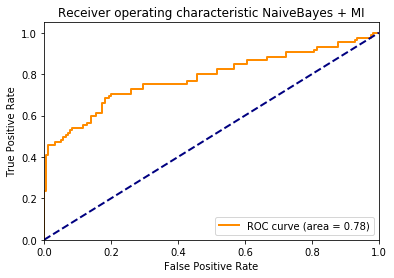

Precision: 0.8684951716738197
Recall: 0.6795751633986928
              precision    recall  f1-score   support

      benign       0.77      0.99      0.87       180
   malignant       0.97      0.36      0.53        85

    accuracy                           0.79       265
   macro avg       0.87      0.68      0.70       265
weighted avg       0.83      0.79      0.76       265



In [136]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_pca, Y_Train).decision_function(X_Test_pca)
Y_Pred = clf.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

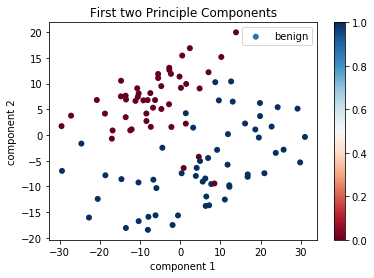

In [137]:
pca = PCA(7)  


X_pca = Thyroid_data_train.drop(columns = ['Name', 'tissue', 'histology', 'gender'])
X_pca['cytology'] = label_binarize(Y_Train,classes = ['benign', 'malignant'])
Pca_data = pca.fit_transform(X_pca)





plt.scatter(Pca_data[:, 0],Pca_data[:, 1], c = X_pca.cytology,cmap = 'RdBu', edgecolor='none', alpha=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(['benign', 'malignant'], loc='upper right')
plt.title('First two Principle Components')

plt.colorbar();
plt.show()

## Pls Regression

In [138]:
transformer = Normalizer().fit(X_Train_age_gender)  
X_Train_Normalized = transformer.transform(X_Train_age_gender)
X_Test_Normalized =  transformer.transform(X_Test_age_gender)

In [139]:
pls2 = PLSRegression(n_components=4)
ytrain = label_binarize(Y_Train,classes = ['benign', 'malignant'])
pls2.fit(X_Train_gender,ytrain)
X_Train_pls = pls2.transform(X_Train_gender)
X_Test_pls = pls2.transform(X_Test_gender)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[170  10]
 [ 43  42]]
Accuracy: 0.8
Specificity: 0.9444444444444444
sensitivity 0.23333333333333334


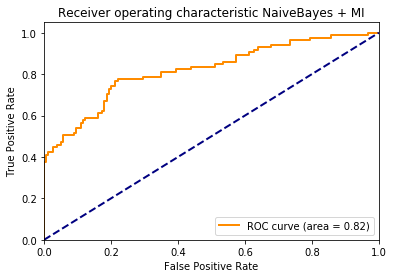

Precision: 0.8029071867100036
Recall: 0.719281045751634
              precision    recall  f1-score   support

      benign       0.80      0.94      0.87       180
   malignant       0.81      0.49      0.61        85

    accuracy                           0.80       265
   macro avg       0.80      0.72      0.74       265
weighted avg       0.80      0.80      0.78       265



In [140]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_pls, Y_Train).decision_function(X_Test_pls)
Y_Pred = clf.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

## Mutual Information

In [141]:
MI = mutual_info_regression(X_Train,ytrain, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
MI.shape

(175,)

In [143]:
index = []
for i in range(175):
    index.append(i)
index = np.array(index)

    

In [144]:
MI_Scores = pd.DataFrame(MI,index)
MI_Scores.columns = ['MI_Score']

In [145]:
MI_Desc = MI_Scores.sort_values(by='MI_Score', ascending=False)

In [146]:
M = MI_Desc[0:140]

In [147]:
M.index.values

array([ 13, 171, 102,   4,  63,  61,  32,  36,  97, 134,  10, 109,  72,
        76,  11,  34, 108,  79, 140, 172,  14,  49,   9,  42,  94,  91,
        75, 125,  82, 132, 112, 110,  43,  85, 170,  98,  69,  29,  81,
       105, 114,  18, 107,  87,  37,  17, 124,  51, 160, 143, 123,  16,
         7,  96,  93, 106,  20, 155, 159, 118,  46, 157,  26, 119, 168,
       153,  48,  35,  68,   2,  39, 127, 128,  15,  86, 167,  58, 138,
         6,  99,  89, 151,  84,   5, 141, 147,  12, 163, 174,  71,  88,
        66,   1, 129,  30,  55, 164, 117,  77, 104, 116, 121,  53, 130,
       166, 158,  95, 154,  38, 173,  44, 144, 142,  67, 150,  90, 126,
        64,  31,  22, 169,  83, 122,  25, 145,   3, 135,  54, 156,  21,
       162,  47,  62,  52,  59, 139,  57,  74, 148,  24], dtype=int64)

In [148]:
Z = []
for i in (M.index.values):
    Z.append(X_Train.iloc[:,i])
    
T = []
for i in (M.index.values):
    T.append(X_Test.iloc[:,i])
    
    

In [149]:
D = pd.DataFrame(Z)
D_T = pd.DataFrame(T)
X = D.T
X_T = D_T.T

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[174   6]
 [ 40  45]]
Accuracy: 0.8264150943396227
Specificity: 0.9666666666666667
sensitivity 0.25


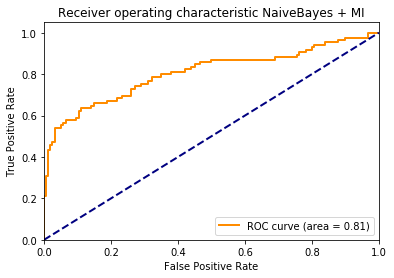

Precision: 0.8477185266630016
Recall: 0.7480392156862745
              precision    recall  f1-score   support

      benign       0.81      0.97      0.88       180
   malignant       0.88      0.53      0.66        85

    accuracy                           0.83       265
   macro avg       0.85      0.75      0.77       265
weighted avg       0.84      0.83      0.81       265



In [150]:
clf = LogisticRegression()
y_score = clf.fit(X, Y_Train).decision_function(X_T)
Y_Pred = clf.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

In [151]:
pca = PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_Train_pca = pca.transform(X)
X_Test_pca = pca.transform(X_T)

[0.52872011 0.23219869 0.05320202 0.04388906 0.02184522 0.02125038
 0.00996265]


C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[178   2]
 [ 55  30]]
Accuracy: 0.7849056603773585
Specificity: 0.9888888888888889
sensitivity 0.16666666666666666


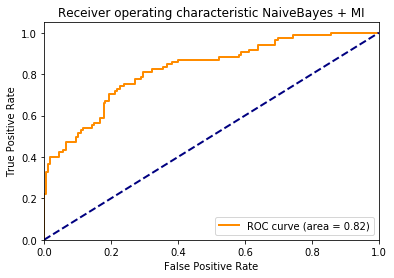

Precision: 0.8507242489270386
Recall: 0.6709150326797386
              precision    recall  f1-score   support

      benign       0.76      0.99      0.86       180
   malignant       0.94      0.35      0.51        85

    accuracy                           0.78       265
   macro avg       0.85      0.67      0.69       265
weighted avg       0.82      0.78      0.75       265



In [152]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_pca, Y_Train).decision_function(X_Test_pca)
Y_Pred = clf.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

Confusion Matrix: [[163  17]
 [ 44  41]]
Accuracy: 0.769811320754717
Specificity: 0.9055555555555556
sensitivity 0.22777777777777777


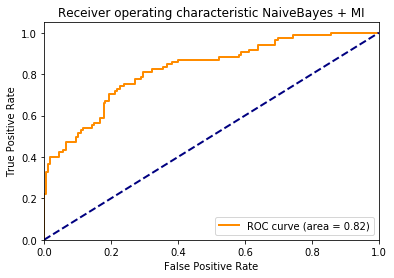

Precision: 0.747168082625354
Recall: 0.693954248366013
              precision    recall  f1-score   support

      benign       0.79      0.91      0.84       180
   malignant       0.71      0.48      0.57        85

    accuracy                           0.77       265
   macro avg       0.75      0.69      0.71       265
weighted avg       0.76      0.77      0.76       265



In [153]:
gnb = GaussianNB()
gnb.fit(X_Train_pca, Y_Train)
Y_Pred = gnb.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

In [154]:
pls2 = PLSRegression(n_components=4)
ytrain = label_binarize(Y_Train,classes = ['benign', 'malignant'])
ytest = label_binarize(Y_Test,classes = ['benign', 'malignant'])
pls2.fit(X,ytrain)
X_Train_pls = pls2.transform(X)
X_Test_pls = pls2.transform(X_T)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[173   7]
 [ 48  37]]
Accuracy: 0.7924528301886793
Specificity: 0.9611111111111111
sensitivity 0.20555555555555555


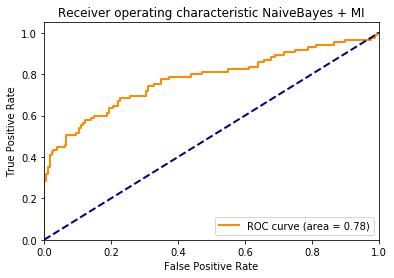

Precision: 0.8118572603866722
Recall: 0.6982026143790849
              precision    recall  f1-score   support

      benign       0.78      0.96      0.86       180
   malignant       0.84      0.44      0.57        85

    accuracy                           0.79       265
   macro avg       0.81      0.70      0.72       265
weighted avg       0.80      0.79      0.77       265



In [180]:
clf = LogisticRegression()
y_score = clf.fit(X_Train_pls, Y_Train).decision_function(X_Test_pls)
Y_Pred = clf.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

Confusion Matrix: [[175   5]
 [ 47  38]]
Accuracy: 0.8037735849056604
Specificity: 0.9722222222222222
sensitivity 0.2111111111111111


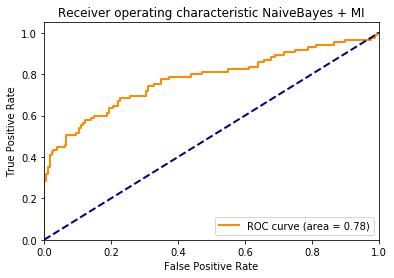

Precision: 0.8360046092604232
Recall: 0.709640522875817
              precision    recall  f1-score   support

      benign       0.79      0.97      0.87       180
   malignant       0.88      0.45      0.59        85

    accuracy                           0.80       265
   macro avg       0.84      0.71      0.73       265
weighted avg       0.82      0.80      0.78       265



In [156]:
gnb = GaussianNB()
gnb.fit(X_Train_pls, Y_Train)
Y_Pred = gnb.predict(X_Test_pls)

Evaluation(X_Train_pls,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: [[143  37]
 [ 27  58]]
Accuracy: 0.7584905660377359
Specificity: 0.7944444444444444
sensitivity 0.32222222222222224


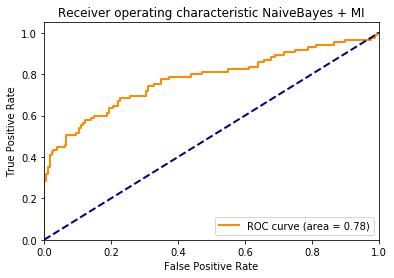

Precision: 0.7258513931888545
Recall: 0.7383986928104576
              precision    recall  f1-score   support

      benign       0.84      0.79      0.82       180
   malignant       0.61      0.68      0.64        85

    accuracy                           0.76       265
   macro avg       0.73      0.74      0.73       265
weighted avg       0.77      0.76      0.76       265



In [157]:
sv = SVC()
sv.fit(X_Train_pls, Y_Train)
Y_Pred = sv.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: [[ 26 154]
 [  4  81]]
Accuracy: 0.4037735849056604
Specificity: 0.14444444444444443
sensitivity 0.45


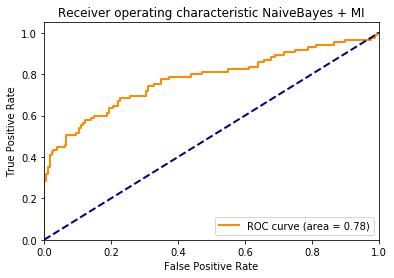

Precision: 0.6056737588652482
Recall: 0.5486928104575163
              precision    recall  f1-score   support

      benign       0.87      0.14      0.25       180
   malignant       0.34      0.95      0.51        85

    accuracy                           0.40       265
   macro avg       0.61      0.55      0.38       265
weighted avg       0.70      0.40      0.33       265



In [158]:
sv = SVC()
sv.fit(X_Train_pca, Y_Train)
Y_Pred = sv.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[ 65 115]
 [ 41  44]]
Accuracy: 0.41132075471698115
Specificity: 0.3611111111111111
sensitivity 0.24444444444444444


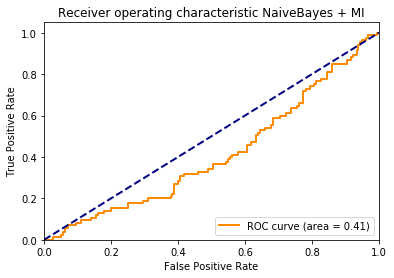

Precision: 0.44496855345911945
Recall: 0.43937908496732025
              precision    recall  f1-score   support

      benign       0.61      0.36      0.45       180
   malignant       0.28      0.52      0.36        85

    accuracy                           0.41       265
   macro avg       0.44      0.44      0.41       265
weighted avg       0.51      0.41      0.42       265



In [159]:
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape
X_embedded_test = TSNE(n_components = 3).fit_transform(X_T)
X_embedded_test.shape
clf = LogisticRegression()
y_score = clf.fit(X_embedded, Y_Train).decision_function(X_embedded_test)
Y_Pred = clf.predict(X_embedded_test)
Evaluation(X_embedded_test,Y_Test,Y_Pred)

## TSNE

In [160]:
X_embedded = TSNE(n_components=3).fit_transform(X_Train)
X_embedded.shape
X_embedded_test = TSNE(n_components = 3).fit_transform(X_Test)
X_embedded_test.shape

(265, 3)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix: [[ 65 115]
 [ 38  47]]
Accuracy: 0.4226415094339623
Specificity: 0.3611111111111111
sensitivity 0.2611111111111111


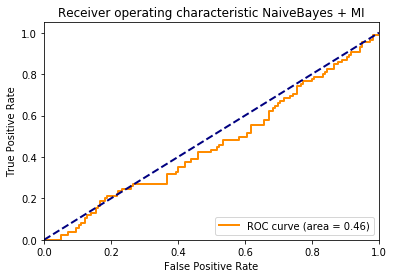

Precision: 0.46059570897758606
Recall: 0.4570261437908497
              precision    recall  f1-score   support

      benign       0.63      0.36      0.46       180
   malignant       0.29      0.55      0.38        85

    accuracy                           0.42       265
   macro avg       0.46      0.46      0.42       265
weighted avg       0.52      0.42      0.43       265



In [161]:
clf = LogisticRegression()
y_score = clf.fit(X_embedded, Y_Train).decision_function(X_embedded_test)
Y_Pred = clf.predict(X_embedded_test)
Evaluation(X_embedded_test,Y_Test,Y_Pred)

## NB

Confusion Matrix: [[175   5]
 [ 47  38]]
Accuracy: 0.8037735849056604
Specificity: 0.9722222222222222
sensitivity 0.2111111111111111


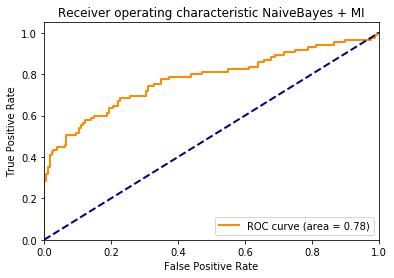

Precision: 0.8360046092604232
Recall: 0.709640522875817
              precision    recall  f1-score   support

      benign       0.79      0.97      0.87       180
   malignant       0.88      0.45      0.59        85

    accuracy                           0.80       265
   macro avg       0.84      0.71      0.73       265
weighted avg       0.82      0.80      0.78       265



In [181]:
gnb = GaussianNB()
gnb.fit(X_Train_pls, Y_Train)
Y_Pred = gnb.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

Confusion Matrix: [[171   9]
 [ 47  38]]
Accuracy: 0.7886792452830189
Specificity: 0.95
sensitivity 0.2111111111111111


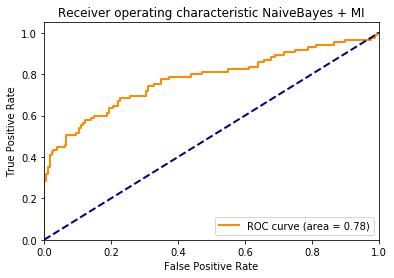

Precision: 0.7964571540113214
Recall: 0.6985294117647058
              precision    recall  f1-score   support

      benign       0.78      0.95      0.86       180
   malignant       0.81      0.45      0.58        85

    accuracy                           0.79       265
   macro avg       0.80      0.70      0.72       265
weighted avg       0.79      0.79      0.77       265



In [182]:
gnb = GaussianNB()
gnb.fit(X, Y_Train)
Y_Pred = gnb.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

## SVM

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion Matrix: [[158  22]
 [ 40  45]]
Accuracy: 0.7660377358490567
Specificity: 0.8777777777777778
sensitivity 0.25


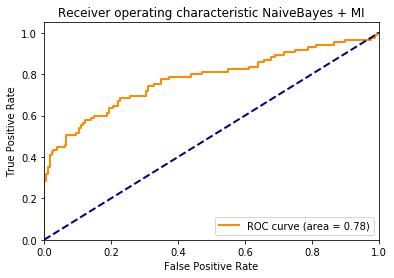

Precision: 0.734810794512287
Recall: 0.70359477124183
              precision    recall  f1-score   support

      benign       0.80      0.88      0.84       180
   malignant       0.67      0.53      0.59        85

    accuracy                           0.77       265
   macro avg       0.73      0.70      0.71       265
weighted avg       0.76      0.77      0.76       265



In [183]:
sv = SVC()
sv.fit(X_Train, Y_Train)
Y_Pred = sv.predict(X_Test)
Evaluation(X_Test,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\svm\base.py:

Confusion Matrix: [[155  25]
 [ 39  46]]
Accuracy: 0.7584905660377359
Specificity: 0.8611111111111112
sensitivity 0.25555555555555554


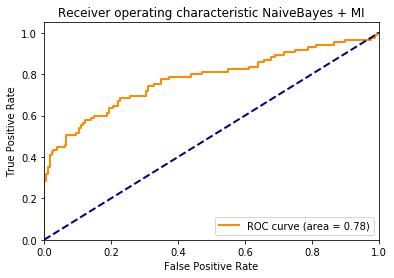

Precision: 0.7234281980543052
Recall: 0.7011437908496732
              precision    recall  f1-score   support

      benign       0.80      0.86      0.83       180
   malignant       0.65      0.54      0.59        85

    accuracy                           0.76       265
   macro avg       0.72      0.70      0.71       265
weighted avg       0.75      0.76      0.75       265



In [184]:
sv = SVC()
sv.fit(X, Y_Train)
cv_score = cross_validate(sv, X, Y_Train, cv=10,return_train_score = True)
Y_Pred = sv.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

In [185]:
################# Random Forest #################################

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix: [[171   9]
 [ 44  41]]
Accuracy: 0.8
Specificity: 0.95
sensitivity 0.22777777777777777


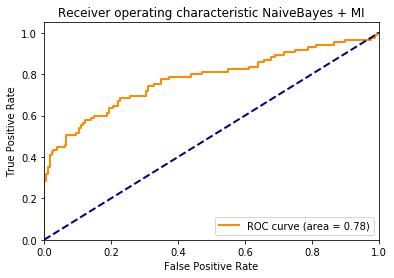

Precision: 0.8076744186046512
Recall: 0.7161764705882353
              precision    recall  f1-score   support

      benign       0.80      0.95      0.87       180
   malignant       0.82      0.48      0.61        85

    accuracy                           0.80       265
   macro avg       0.81      0.72      0.74       265
weighted avg       0.80      0.80      0.78       265



In [186]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X, Y_Train)
Y_Pred = clf.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix: [[169  11]
 [ 44  41]]
Accuracy: 0.7924528301886793
Specificity: 0.9388888888888889
sensitivity 0.22777777777777777


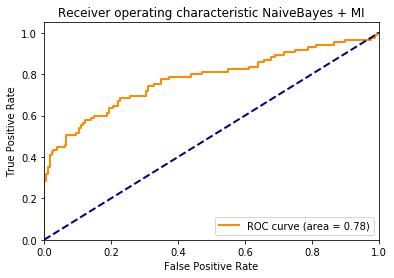

Precision: 0.7909443842542434
Recall: 0.7106209150326798
              precision    recall  f1-score   support

      benign       0.79      0.94      0.86       180
   malignant       0.79      0.48      0.60        85

    accuracy                           0.79       265
   macro avg       0.79      0.71      0.73       265
weighted avg       0.79      0.79      0.78       265



In [187]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_Train, Y_Train)
Y_Pred = clf.predict(X_Test)
Evaluation(X_Test,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix: [[170  10]
 [ 40  45]]
Accuracy: 0.8113207547169812
Specificity: 0.9444444444444444
sensitivity 0.25


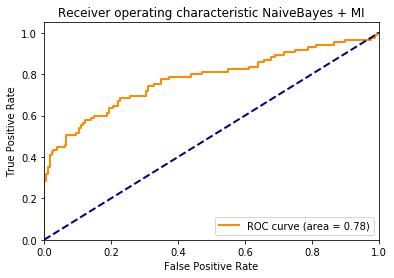

Precision: 0.8138528138528138
Recall: 0.7369281045751634
              precision    recall  f1-score   support

      benign       0.81      0.94      0.87       180
   malignant       0.82      0.53      0.64        85

    accuracy                           0.81       265
   macro avg       0.81      0.74      0.76       265
weighted avg       0.81      0.81      0.80       265



In [188]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_Train_pls, Y_Train)
Y_Pred = clf.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix: [[143  37]
 [ 36  49]]
Accuracy: 0.7245283018867924
Specificity: 0.7944444444444444
sensitivity 0.2722222222222222


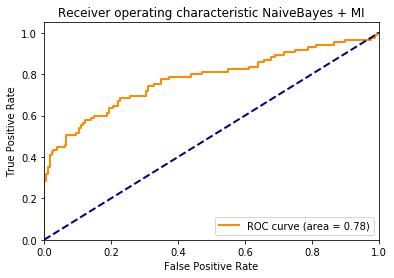

Precision: 0.6843250617123555
Recall: 0.6854575163398693
              precision    recall  f1-score   support

      benign       0.80      0.79      0.80       180
   malignant       0.57      0.58      0.57        85

    accuracy                           0.72       265
   macro avg       0.68      0.69      0.68       265
weighted avg       0.73      0.72      0.72       265



In [189]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_Train_pca, Y_Train)
Y_Pred = clf.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

In [190]:
####### Ada Boost #################

Confusion Matrix: [[173   7]
 [ 43  42]]
Accuracy: 0.8113207547169812
Specificity: 0.9611111111111111
sensitivity 0.23333333333333334


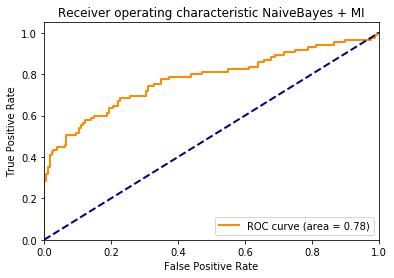

Precision: 0.8290343915343915
Recall: 0.7276143790849674
              precision    recall  f1-score   support

      benign       0.80      0.96      0.87       180
   malignant       0.86      0.49      0.63        85

    accuracy                           0.81       265
   macro avg       0.83      0.73      0.75       265
weighted avg       0.82      0.81      0.79       265



In [191]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_Train, Y_Train)
Y_Pred = clf.predict(X_Test)
Evaluation(X_Test,Y_Test,Y_Pred)

Confusion Matrix: [[165  15]
 [ 45  40]]
Accuracy: 0.7735849056603774
Specificity: 0.9166666666666666
sensitivity 0.2222222222222222


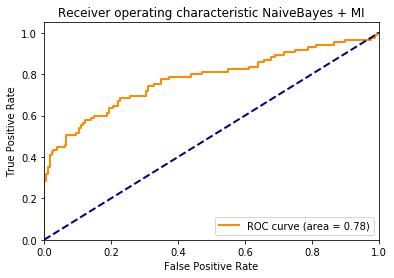

Precision: 0.7564935064935066
Recall: 0.6936274509803921
              precision    recall  f1-score   support

      benign       0.79      0.92      0.85       180
   malignant       0.73      0.47      0.57        85

    accuracy                           0.77       265
   macro avg       0.76      0.69      0.71       265
weighted avg       0.77      0.77      0.76       265



In [192]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_Train_pls, Y_Train)
Y_Pred = clf.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

Confusion Matrix: [[165  15]
 [ 45  40]]
Accuracy: 0.7735849056603774
Specificity: 0.9166666666666666
sensitivity 0.2222222222222222


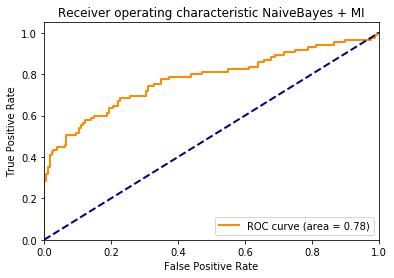

Precision: 0.7564935064935066
Recall: 0.6936274509803921
              precision    recall  f1-score   support

      benign       0.79      0.92      0.85       180
   malignant       0.73      0.47      0.57        85

    accuracy                           0.77       265
   macro avg       0.76      0.69      0.71       265
weighted avg       0.77      0.77      0.76       265



In [193]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X, Y_Train)
Y_Pred = clf.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

Confusion Matrix: [[168  12]
 [ 48  37]]
Accuracy: 0.7735849056603774
Specificity: 0.9333333333333333
sensitivity 0.20555555555555555


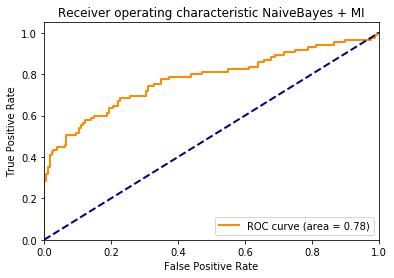

Precision: 0.7664399092970522
Recall: 0.6843137254901961
              precision    recall  f1-score   support

      benign       0.78      0.93      0.85       180
   malignant       0.76      0.44      0.55        85

    accuracy                           0.77       265
   macro avg       0.77      0.68      0.70       265
weighted avg       0.77      0.77      0.75       265



In [194]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X_Train_pca, Y_Train)
Y_Pred = clf.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

In [195]:
#### Gradient Boost ############

Confusion Matrix: [[158  22]
 [ 52  33]]
Accuracy: 0.720754716981132
Specificity: 0.8777777777777778
sensitivity 0.18333333333333332


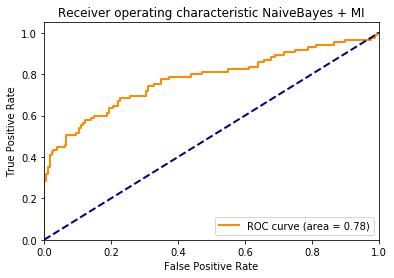

Precision: 0.6761904761904762
Recall: 0.6330065359477124
              precision    recall  f1-score   support

      benign       0.75      0.88      0.81       180
   malignant       0.60      0.39      0.47        85

    accuracy                           0.72       265
   macro avg       0.68      0.63      0.64       265
weighted avg       0.70      0.72      0.70       265



In [196]:
clf = GradientBoostingClassifier(n_estimators = 200, random_state=0)
clf.fit(X, Y_Train)
Y_Pred = clf.predict(X_T)
Evaluation(X_T,Y_Test,Y_Pred)

In [197]:
### XG Boost ###############

Confusion Matrix: [[168  12]
 [ 44  41]]
Accuracy: 0.7886792452830189
Specificity: 0.9333333333333333
sensitivity 0.22777777777777777


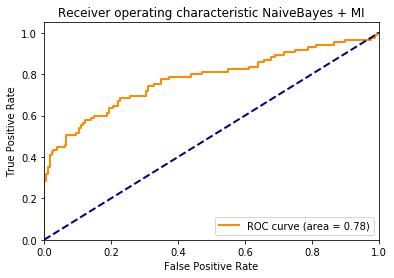

Precision: 0.7830188679245284
Recall: 0.707843137254902
              precision    recall  f1-score   support

      benign       0.79      0.93      0.86       180
   malignant       0.77      0.48      0.59        85

    accuracy                           0.79       265
   macro avg       0.78      0.71      0.73       265
weighted avg       0.79      0.79      0.77       265



In [198]:
clf = XGBClassifier()
clf.fit(X_Train_pls, Y_Train)
Y_Pred = clf.predict(X_Test_pls)
Evaluation(X_Test_pls,Y_Test,Y_Pred)

Confusion Matrix: [[158  22]
 [ 46  39]]
Accuracy: 0.7433962264150943
Specificity: 0.8777777777777778
sensitivity 0.21666666666666667


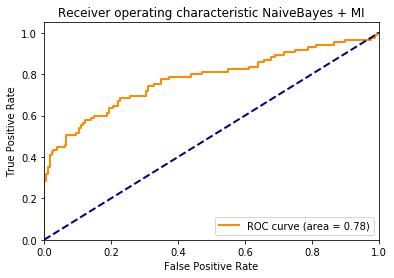

Precision: 0.7069270331083253
Recall: 0.6683006535947712
              precision    recall  f1-score   support

      benign       0.77      0.88      0.82       180
   malignant       0.64      0.46      0.53        85

    accuracy                           0.74       265
   macro avg       0.71      0.67      0.68       265
weighted avg       0.73      0.74      0.73       265



In [199]:
clf = XGBClassifier()
clf.fit(X_Train_pca, Y_Train)
Y_Pred = clf.predict(X_Test_pca)
Evaluation(X_Test_pca,Y_Test,Y_Pred)

Confusion Matrix: [[174   6]
 [ 44  41]]
Accuracy: 0.8113207547169812
Specificity: 0.9666666666666667
sensitivity 0.22777777777777777


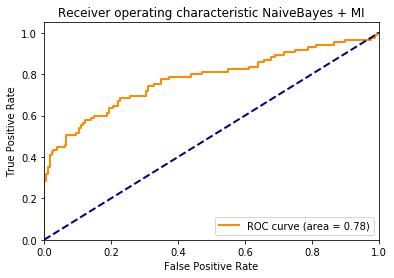

Precision: 0.8352527815732969
Recall: 0.7245098039215686
              precision    recall  f1-score   support

      benign       0.80      0.97      0.87       180
   malignant       0.87      0.48      0.62        85

    accuracy                           0.81       265
   macro avg       0.84      0.72      0.75       265
weighted avg       0.82      0.81      0.79       265



In [200]:
clf = XGBClassifier()
clf.fit(X_Train_age_gender, Y_Train)
Y_Pred = clf.predict(X_Test_age_gender)
Evaluation(X_Test_age_gender,Y_Test,Y_Pred)

In [201]:
### Neural Network ###########

In [202]:
model = Sequential()
model.add(Dense(24, input_dim= 173, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_Train_age_gender, ytrain, epochs = 100, batch_size=20,validation_split = 0.1)

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.2435 - accuracy: 0.55 - 0s 27ms/step - loss: 0.8142 - accuracy: 0.5934 - val_loss: 0.4865 - val_accuracy: 0.7273
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.5346 - accuracy: 0.60 - 0s 5ms/step - loss: 0.5839 - accuracy: 0.6264 - val_loss: 0.5300 - val_accuracy: 0.7273
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.70 - 0s 5ms/step - loss: 0.5659 - accuracy: 0.7582 - val_loss: 0.4552 - val_accuracy: 0.8182
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.80 - 0s 6ms/step - loss: 0.5017 - accuracy: 0.7473 - val_loss: 0.2969 - val_accuracy: 0.9091
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.90 - 0s 5ms/step - loss: 0.3750 - accuracy: 0.8462 - val_loss: 0.2475 - val_accuracy: 0.9091
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.65 - 0

In [203]:
Y_Pred = model.predict_classes(X_Test_age_gender)


Confusion Matrix: [[179   1]
 [ 48  37]]
Accuracy: 0.8150943396226416
Specificity: 0.9944444444444445
sensitivity 0.20555555555555555


C:\Users\vashatkar\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


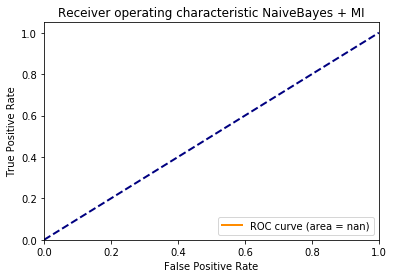

Precision: 0.8811152330164619
Recall: 0.7148692810457516
              precision    recall  f1-score   support

      benign       0.79      0.99      0.88       180
   malignant       0.97      0.44      0.60        85

    accuracy                           0.82       265
   macro avg       0.88      0.71      0.74       265
weighted avg       0.85      0.82      0.79       265



In [204]:
Evaluation(X_Test_age_gender,ytest,Y_Pred)

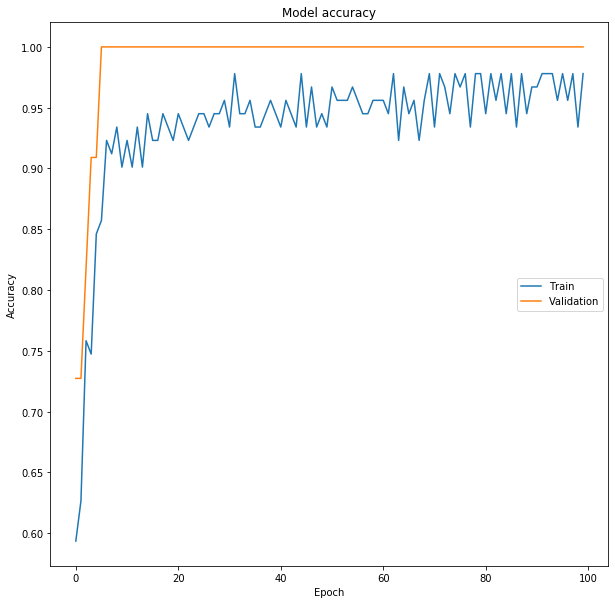

In [205]:
plt.figure(figsize = (10, 10))
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

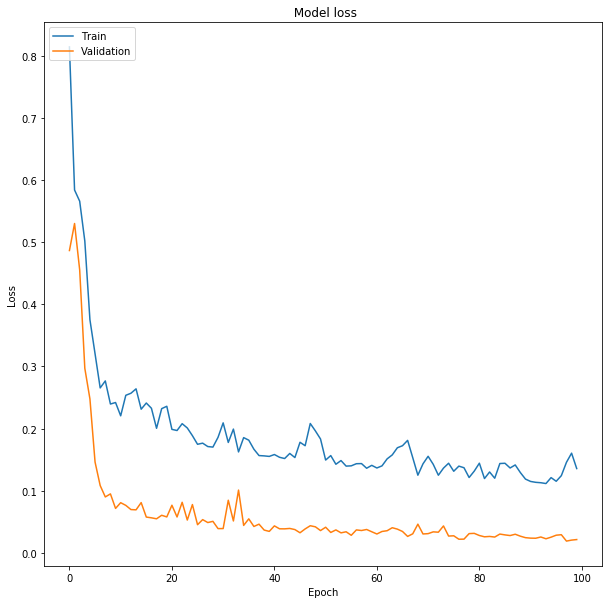

In [206]:
# Plot training & validation loss values
plt.figure(figsize = (10, 10))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title(' Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.65 - 0s 30ms/step - loss: 0.6148 - accuracy: 0.6923 - val_loss: 0.5427 - val_accuracy: 0.9091
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.90 - 0s 5ms/step - loss: 0.5431 - accuracy: 0.8132 - val_loss: 0.4771 - val_accuracy: 0.9091
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.5018 - accuracy: 0.90 - 0s 5ms/step - loss: 0.4867 - accuracy: 0.8352 - val_loss: 0.4161 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.65 - 0s 5ms/step - loss: 0.4329 - accuracy: 0.8681 - val_loss: 0.3531 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.4191 - accuracy: 0.85 - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8901 - val_loss: 0.2968 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.90 - 0

C:\Users\vashatkar\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


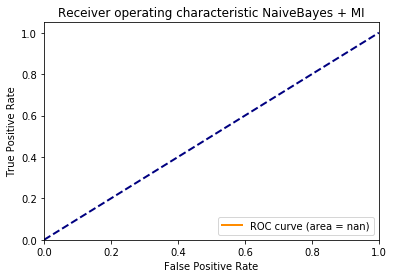

Precision: 0.769240379810095
Recall: 0.7112745098039215
              precision    recall  f1-score   support

      benign       0.80      0.92      0.85       180
   malignant       0.74      0.51      0.60        85

    accuracy                           0.78       265
   macro avg       0.77      0.71      0.73       265
weighted avg       0.78      0.78      0.77       265



In [207]:
model = Sequential()
model.add(Dense(24, input_dim= 4, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_Train_pls, ytrain, epochs = 100, batch_size=20,validation_split = 0.1)
Y_Pred = model.predict_classes(X_Test_pls)
Evaluation(X_Test_pls,ytest,Y_Pred)

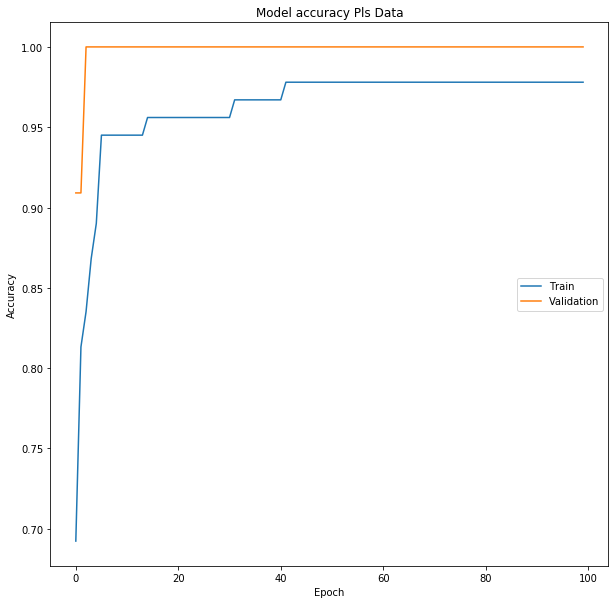

In [208]:
plt.figure(figsize = (10, 10))
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy Pls Data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

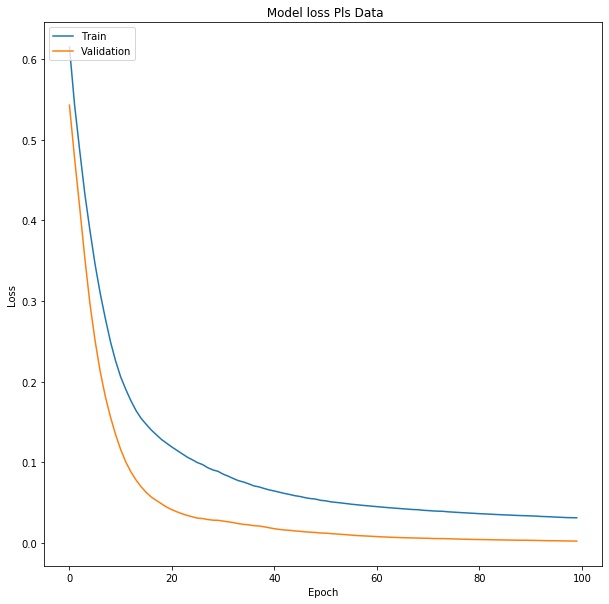

In [209]:
# Plot training & validation loss values
plt.figure(figsize = (10, 10))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title(' Model loss Pls Data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 1.1720 - accuracy: 0.60 - 0s 23ms/step - loss: 0.9856 - accuracy: 0.6484 - val_loss: 0.7725 - val_accuracy: 0.7273
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 0.9841 - accuracy: 0.65 - 0s 5ms/step - loss: 0.7073 - accuracy: 0.7253 - val_loss: 0.5429 - val_accuracy: 0.8182
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.80 - 0s 5ms/step - loss: 0.5464 - accuracy: 0.7582 - val_loss: 0.3907 - val_accuracy: 0.8182
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.85 - 0s 6ms/step - loss: 0.4316 - accuracy: 0.7692 - val_loss: 0.2878 - val_accuracy: 0.8182
Epoch 5/100
5/5 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.90 - 0s 5ms/step - loss: 0.3626 - accuracy: 0.8132 - val_loss: 0.2193 - val_accuracy: 0.8182
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.85 - 0

C:\Users\vashatkar\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
C:\Users\vashatkar\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


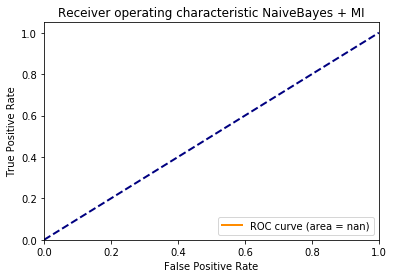

Precision: 0.6731418918918919
Recall: 0.667483660130719
              precision    recall  f1-score   support

      benign       0.78      0.81      0.79       180
   malignant       0.56      0.53      0.55        85

    accuracy                           0.72       265
   macro avg       0.67      0.67      0.67       265
weighted avg       0.71      0.72      0.71       265



In [210]:
model = Sequential()
model.add(Dense(24, input_dim= 7, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_Train_pca, ytrain, epochs = 100, batch_size=20,validation_split = 0.1)
Y_Pred = model.predict_classes(X_Test_pca)
Evaluation(X_Test_pca,ytest,Y_Pred)

In [211]:
####################

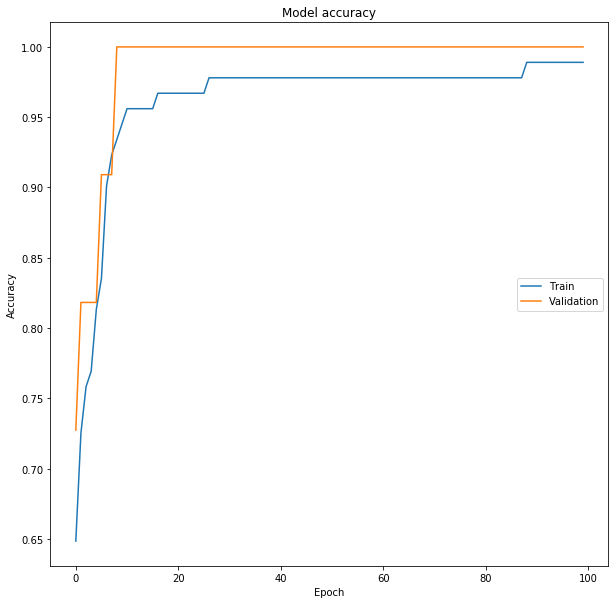

In [212]:
plt.figure(figsize = (10, 10))
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

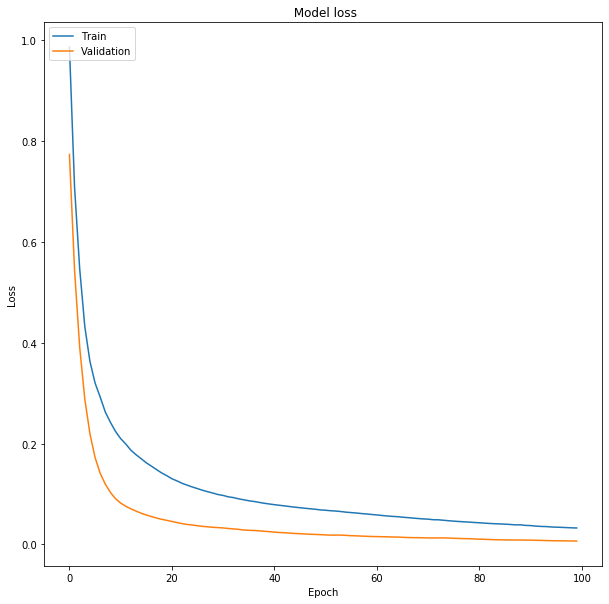

In [213]:
# Plot training & validation loss values
plt.figure(figsize = (10, 10))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title(' Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()